In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_anime.zip to data_anime.zip


In [11]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

with zipfile.ZipFile("data_anime.zip", 'r') as zip_ref:
    zip_ref.extractall("data_anime")

# Lihat isi folder hasil ekstrak
os.listdir("data_anime")




['anime.csv']

In [6]:
num = df.select_dtypes(include=['int64','float64'])

stats = pd.DataFrame({
    'mean': num.mean(),
    'std': num.std(),
    'min': num.min(),
    'Q1': num.quantile(0.25),
    'Q2 (median)': num.quantile(0.50),
    'Q3': num.quantile(0.75),
    'max': num.max()
})
stats

,mean,std,min,Q1,Q2 (median),Q3,max
anime_id,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [7]:
df.select_dtypes(include=['int64','float64']).head(10)


,anime_id,rating,members
0,32281,9.37,200630
1,5114,9.26,793665
2,28977,9.25,114262
3,9253,9.17,673572
4,9969,9.16,151266
5,32935,9.15,93351
6,11061,9.13,425855
7,820,9.11,80679
8,15335,9.10,72534
9,15417,9.11,81109


In [8]:
print("Jumlah record:", df.shape[0])
print("Jumlah atribut:", df.shape[1])
print("\nNama atribut:", list(df.columns))

num_attr = df.select_dtypes(include=['int64','float64']).shape[1]
print("\nJumlah atribut numerik:", num_attr)


Jumlah record: 12294
Jumlah atribut: 7

Nama atribut: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

Jumlah atribut numerik: 3


In [9]:
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
    print(f"{col}: {df[col].nunique()} label unik")


name: 12292 label unik
genre: 3264 label unik
type: 6 label unik
episodes: 187 label unik


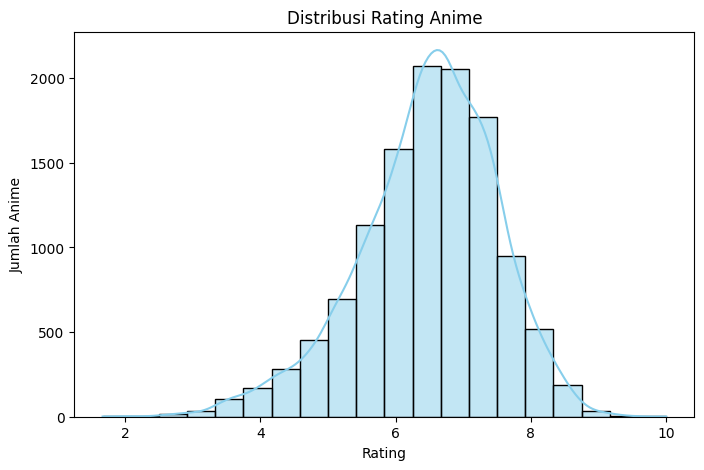

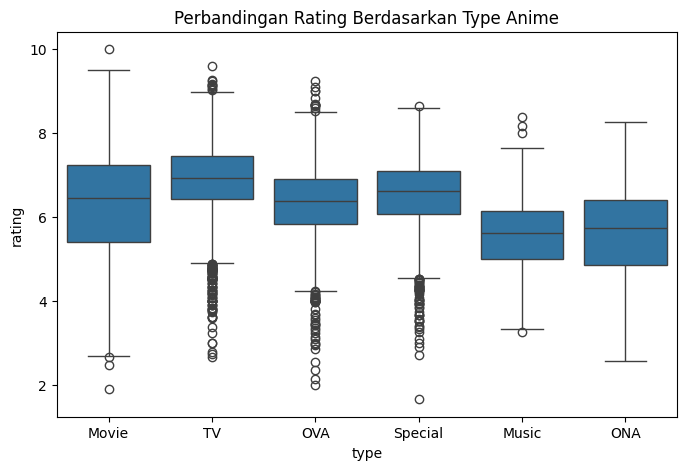

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Rating Anime")
plt.xlabel("Rating")
plt.ylabel("Jumlah Anime")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(x="type", y="rating", data=df)
plt.title("Perbandingan Rating Berdasarkan Type Anime")
plt.show()



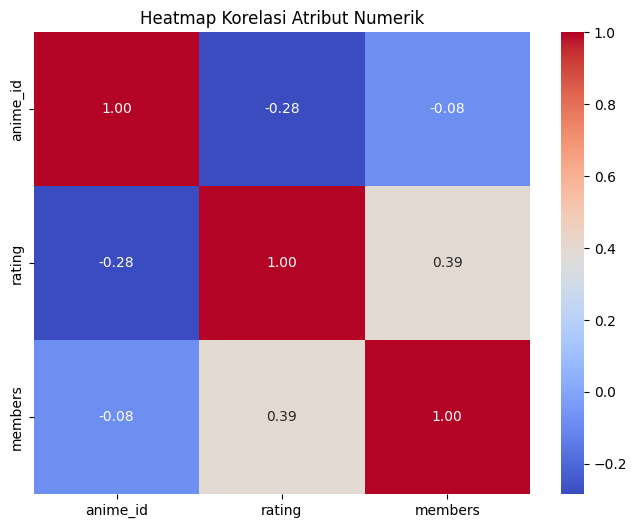

In [14]:
plt.figure(figsize=(8,6))

num_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()


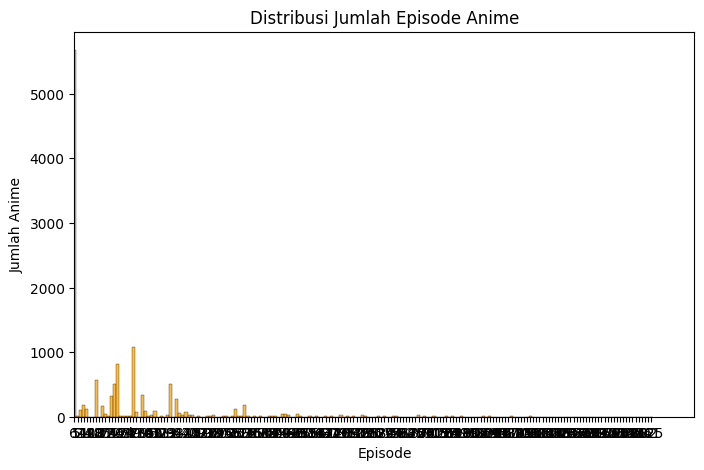

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['episodes'], bins=50, color="orange")
plt.xlim(0,200)  # batasi agar tidak terlalu melebar
plt.title("Distribusi Jumlah Episode Anime")
plt.xlabel("Episode")
plt.ylabel("Jumlah Anime")
plt.show()


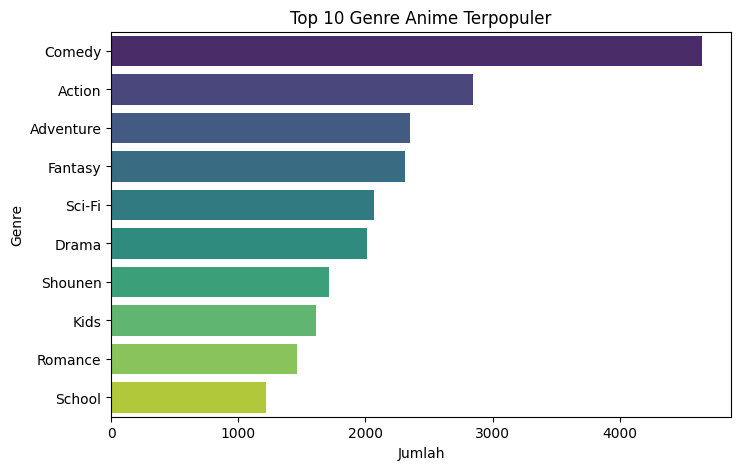

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=[g[1] for g in genre_count],
    y=[g[0] for g in genre_count],
    hue=[g[0] for g in genre_count],
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Top 10 Genre Anime Terpopuler")
plt.xlabel("Jumlah")
plt.ylabel("Genre")
plt.show()



<h1>Kesimpulan Analisis Dataset Anime</h1>
Berdasarkan hasil analisis, dataset anime memiliki beberapa atribut numerik, yaitu anime_id, episodes, rating, dan members. Nilai rata-rata rating anime sekitar 6.4 dengan standar deviasi 1.02, yang menunjukkan bahwa sebagian besar anime mendapatkan nilai cukup tinggi, umumnya berada di atas angka 5. Jumlah anggota (members) sangat bervariasi, mulai dari ratusan hingga lebih dari satu juta pengguna. Hal ini menandakan bahwa terdapat anime yang sangat populer, sementara sebagian lainnya kurang dikenal.

Dari sisi struktur, dataset berisi sekitar 12.000+ record dengan 7 atribut utama seperti anime_id, name, genre, type, episodes, rating, dan members. Atribut kategorikal seperti genre dan type memiliki banyak label unik yang memperlihatkan keragaman genre serta variasi jenis anime.

Visualisasi data menunjukkan bahwa distribusi rating anime cenderung mendekati normal dengan mayoritas anime berada pada rentang rating 6–8. Distribusi jumlah episode juga sangat bervariasi, di mana ada anime dengan 1 episode (seperti Movie atau OVA), tetapi juga ada serial TV yang memiliki ratusan episode. Hasil korelasi antaratribut mengungkapkan adanya hubungan positif sebesar 0.39 antara rating dan members, yang berarti anime dengan rating tinggi cenderung lebih populer dan diminati oleh banyak penonton. Sementara itu, atribut anime_id tidak memberikan kontribusi analisis karena hanya berfungsi sebagai ID unik.

Secara keseluruhan, dapat disimpulkan bahwa anime dengan rating tinggi umumnya lebih populer karena memiliki jumlah penonton yang besar. Sebaran rating yang relatif stabil juga menunjukkan bahwa kualitas anime secara umum cukup baik dan jarang ada anime dengan rating sangat rendah. Variasi jumlah episode mencerminkan adanya perbedaan signifikan antara format anime seperti TV series, movie, dan OVA. Oleh karena itu, dataset ini sangat bermanfaat untuk menganalisis tren popularitas anime berdasarkan genre, jenis, maupun rating yang dimilikinya.